In [18]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw as LambertW

Id, Is, Vd, Vj, Rs, Vt = sp.symbols('Id Is Vd Vj Rs Vt', real=True)

diode_eq = sp.Eq(Id, Is*(sp.exp(Vj/Vt) - 1))
current_eq = sp.Eq(Id, (Vd - Vj)/Rs)

display(diode_eq)
display(current_eq)

sol = sp.solve([diode_eq, current_eq], [Id, Vj], dict=True)[0]

for k, v in sol.items():
    sol[k] = v.simplify()
    display(sp.Eq(k, sol[k]))

Eq(Id, Is*(exp(Vj/Vt) - 1))

Eq(Id, (Vd - Vj)/Rs)

Eq(Id, (-Is*Rs + Vt*LambertW(Is*Rs*exp((Is*Rs + Vd)/Vt)/Vt))/Rs)

Eq(Vj, Is*Rs + Vd - Vt*LambertW(Is*Rs*exp((Is*Rs + Vd)/Vt)/Vt))

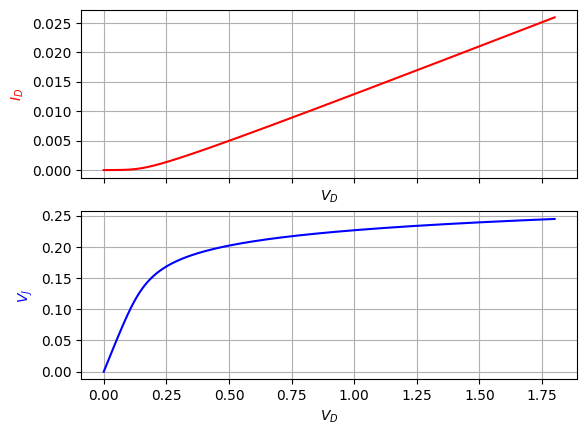

In [25]:
sol_Id = sol[Id]
sol_Vj = sol[Vj]


k = 1.38064852e-23  # define boltzmann constant
T = 300             # define temperature (K)
q = 1.60217662e-19  # define q (charge of electron)

const = {
    Vt: k*T/q,
    # A
    Is: 2e-6,
    # ohm
    Rs: 60    ,
}

import copy
import numpy as np
from scipy.special import lambertw as LambertW
import sympy as sp


# lambdify the functions
def custom_lambdify(x, expr):
    return sp.lambdify(copy.copy(x), copy.copy(expr), modules=[{'LambertW': LambertW, 'exp': np.exp, 'log': np.log}, 'numpy'])

f_Id = custom_lambdify(Vd, sol_Id.subs(const))
f_Vj = custom_lambdify(Vd, sol_Vj.subs(const))

# create a range of voltages
x = np.linspace(0, 1.8, 1000)

# create two different y-axes
fig, axs = plt.subplots(2, 1, sharex=True)
ax1, ax2 = axs

# plot the current
ax1.plot(x, f_Id(x), 'r')
ax1.set_ylabel('$I_D$', color='r')
ax1.set_xlabel('$V_D$')
ax1.grid()

# plot the diode junction voltage
ax2.plot(x, f_Vj(x), 'b')
ax2.set_ylabel('$V_J$', color='b')
ax2.set_xlabel('$V_D$')
ax2.grid()


plt.show()